In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])
y = np.array([45, 55, 50, 59, 65, 35, 75, 80, 50, 60])
X.shape

(2, 10)

In [3]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err
W = np.linalg.inv(X @ X.T) @ X @ y
W

array([47.23214286,  3.91071429])

In [4]:
calc_mse(y, W.dot(X))

45.93749999999999

# Решение заданий к уроку 1

### __1.__ Подберите скорость обучения (alpha) и количество итераций:

In [5]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1., 0.5])
W, alpha

(array([1. , 0.5]), 0.01)

In [6]:
for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for ii in range(W.shape[0]):
        W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
    if i % 100 == 0:
        print(i, W, err)

0 [2.102 3.9  ] 3173.15
100 [31.88770806  6.74418155] 175.19445858001853
200 [41.83683774  4.90699865] 61.9177717428135
300 [45.33508261  4.26102097] 47.913169919666785
400 [46.56511152  4.03388672] 46.181755648107604
500 [46.99760587  3.95402334] 45.96769776787538
600 [47.14967657  3.92594232] 45.941233404700036
700 [47.20314662  3.91606866] 45.93796156758051
800 [47.2219474   3.91259695] 45.93755706443538
900 [47.228558    3.91137626] 45.937507054979434


__Решение__

In [7]:
# Построим функцию нормы сходимости для двух массивов W1 и W2
def wnorm(w1,w2):
    return(np.linalg.norm(w1 - w2))

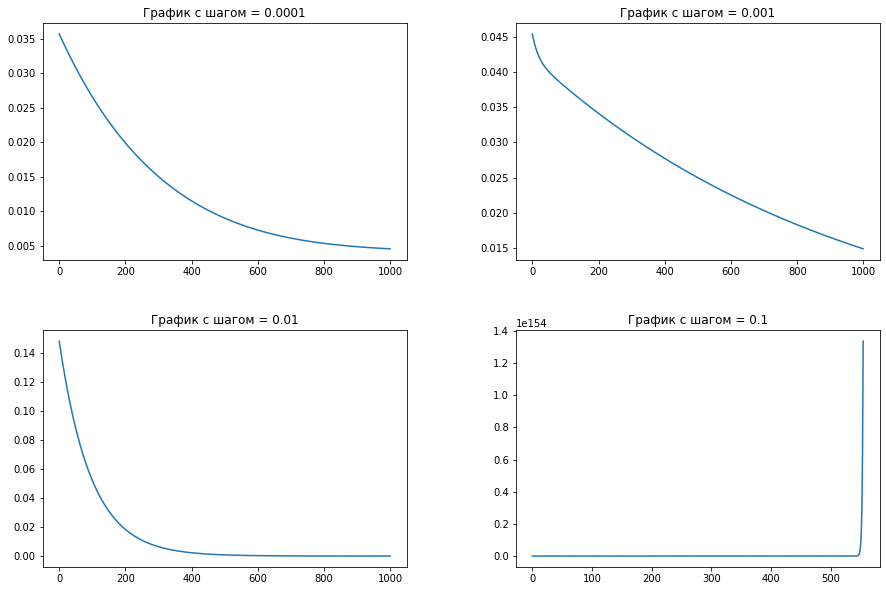

In [8]:
# Построим графики зависимости нормы сходимости от количества итераций
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(15, 10)
fig.subplots_adjust(wspace=0.3, hspace = 0.3)
comb = [(0,0),(0,1),(1,0),(1,1)]
alpha = 0.0001
k = 1000
W = np.array([1., 0.5])

for j in range(4):
    l_rate = []
    W1 = W
    for i in range(1000):
        y_pred = np.dot(W1, X)
        Wp = W1.copy()
        for ii in range(W1.shape[0]):
            W1[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
        l_rate.append(wnorm(W1,Wp))
    ax[comb[j]].plot(range(k),l_rate)
    ax[comb[j]].set_title('График с шагом = '+ str(alpha))
    alpha *=10

На графиках видно что при очень маленьких шагах 1000 итераций недостаточно для сходимости. Уже прои шаге 0.01 показывает хорошую сходимость, но при шаге 0.1 метод градиентного спуска на данной выборке не может подобрать решение, так как слишком большой шаг, и будем все время перепригивать точку решения

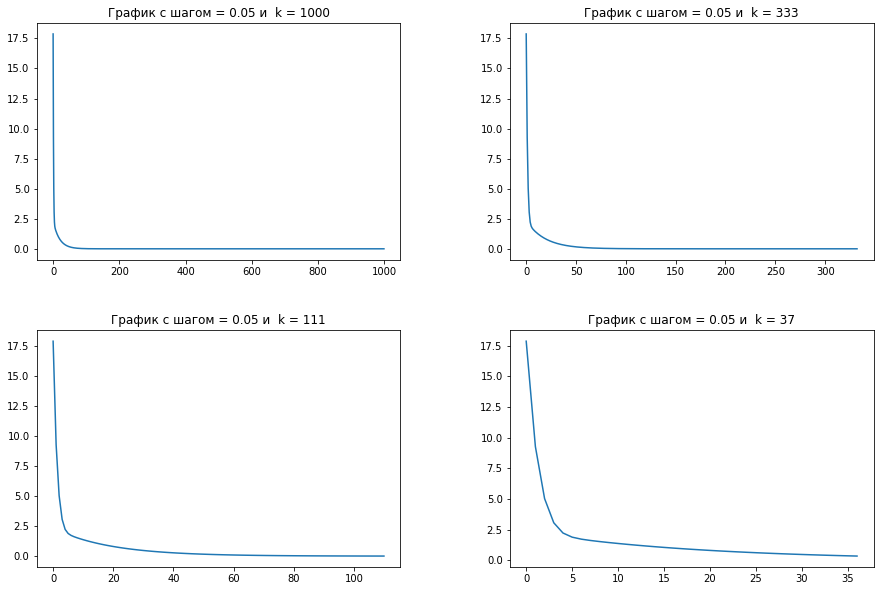

In [9]:
# Построим графики при фиксированном шаге (0.05) и будем уменьшать количество итераций чтобы более точно посмотреть 
# при каком количестве начинается сходимость

fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(15, 10)
fig.subplots_adjust(wspace=0.3, hspace = 0.3)

comb = [(0,0),(0,1),(1,0),(1,1)]
alpha = 0.05
k = 1000
W = np.array([1., 0.5])

for j in range(4):
    l_rate = []
    W1 = W.copy()
    for i in range(k):
        y_pred = np.dot(W1, X)
        Wp = W1.copy()
        for ii in range(W1.shape[0]):
            W1[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
        l_rate.append(wnorm(W1,Wp))
    ax[comb[j]].plot(range(k),l_rate)
    ax[comb[j]].set_title(f'График с шагом = {alpha} и  k = {k}')
    k = k//3

Построим зависимость количества итераций от размера шага при фиксированной точности нормы сходимости

In [14]:
steps = np.linspace(0.01,0.1,20)
steps

array([0.01      , 0.01473684, 0.01947368, 0.02421053, 0.02894737,
       0.03368421, 0.03842105, 0.04315789, 0.04789474, 0.05263158,
       0.05736842, 0.06210526, 0.06684211, 0.07157895, 0.07631579,
       0.08105263, 0.08578947, 0.09052632, 0.09526316, 0.1       ])

In [15]:
k = 2000
W = np.array([1., 0.5])
N =[]
ss = []
eps = 1e-7
for st in steps:
    W1 = W.copy()
    for i in range(k):
        y_pred = np.dot(W1, X)
        Wp = W1.copy()
        for ii in range(W1.shape[0]):
            W1[ii] -= st * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
        if wnorm(W1,Wp) < eps:
            N.append(i)
            ss.append(st)
            break
for j in range(len(ss)):
    print(f'alpha = {round(ss[j],4)},\t k = {N[j]}')

alpha = 0.01,	 k = 1470
alpha = 0.0147,	 k = 1020
alpha = 0.0195,	 k = 784
alpha = 0.0242,	 k = 637
alpha = 0.0289,	 k = 538
alpha = 0.0337,	 k = 465
alpha = 0.0384,	 k = 410
alpha = 0.0432,	 k = 367
alpha = 0.0479,	 k = 332
alpha = 0.0526,	 k = 303
alpha = 0.0574,	 k = 279
alpha = 0.0621,	 k = 258


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in multiply
  if sys.path[0] == '':


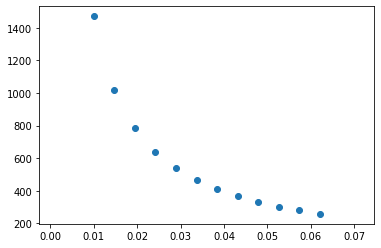

In [16]:
plt.scatter(ss,N)

На графике видно что шагах меньше 0.1 необходимо более 1000 итераций для решения с точностью 0.0000001
В то же время при шаге больше 0.062 метод градиентного спуска на данной выборке перестает работать

В нашем случае получается оптимальным шаг = 0.062. В таком случае с точностью до 1e-7 можем получить решение за 258 итераций 

In [17]:
# Можно попробовать точнее найти

steps = np.linspace(0.06,0.07,101)
steps

array([0.06  , 0.0601, 0.0602, 0.0603, 0.0604, 0.0605, 0.0606, 0.0607,
       0.0608, 0.0609, 0.061 , 0.0611, 0.0612, 0.0613, 0.0614, 0.0615,
       0.0616, 0.0617, 0.0618, 0.0619, 0.062 , 0.0621, 0.0622, 0.0623,
       0.0624, 0.0625, 0.0626, 0.0627, 0.0628, 0.0629, 0.063 , 0.0631,
       0.0632, 0.0633, 0.0634, 0.0635, 0.0636, 0.0637, 0.0638, 0.0639,
       0.064 , 0.0641, 0.0642, 0.0643, 0.0644, 0.0645, 0.0646, 0.0647,
       0.0648, 0.0649, 0.065 , 0.0651, 0.0652, 0.0653, 0.0654, 0.0655,
       0.0656, 0.0657, 0.0658, 0.0659, 0.066 , 0.0661, 0.0662, 0.0663,
       0.0664, 0.0665, 0.0666, 0.0667, 0.0668, 0.0669, 0.067 , 0.0671,
       0.0672, 0.0673, 0.0674, 0.0675, 0.0676, 0.0677, 0.0678, 0.0679,
       0.068 , 0.0681, 0.0682, 0.0683, 0.0684, 0.0685, 0.0686, 0.0687,
       0.0688, 0.0689, 0.069 , 0.0691, 0.0692, 0.0693, 0.0694, 0.0695,
       0.0696, 0.0697, 0.0698, 0.0699, 0.07  ])

In [18]:
k = 400
W = np.array([1., 0.5])
N =[]
ss = []
eps = 1e-7
for st in steps:
    W1 = W.copy()
    for i in range(k):
        y_pred = np.dot(W1, X)
        Wp = W1.copy()
        for ii in range(W1.shape[0]):
            W1[ii] -= st * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
        if wnorm(W1,Wp) < eps:
            N.append(i)
            ss.append(st)
            break
for j in range(len(ss)):
    print(f'alpha = {round(ss[j],4)},\t k = {N[j]}')

alpha = 0.06,	 k = 267
alpha = 0.0601,	 k = 266
alpha = 0.0602,	 k = 266
alpha = 0.0603,	 k = 265
alpha = 0.0604,	 k = 265
alpha = 0.0605,	 k = 265
alpha = 0.0606,	 k = 264
alpha = 0.0607,	 k = 264
alpha = 0.0608,	 k = 263
alpha = 0.0609,	 k = 263
alpha = 0.061,	 k = 262
alpha = 0.0611,	 k = 262
alpha = 0.0612,	 k = 262
alpha = 0.0613,	 k = 261
alpha = 0.0614,	 k = 261
alpha = 0.0615,	 k = 260
alpha = 0.0616,	 k = 260
alpha = 0.0617,	 k = 260
alpha = 0.0618,	 k = 259
alpha = 0.0619,	 k = 259
alpha = 0.062,	 k = 258
alpha = 0.0621,	 k = 258
alpha = 0.0622,	 k = 257
alpha = 0.0623,	 k = 257
alpha = 0.0624,	 k = 257
alpha = 0.0625,	 k = 256
alpha = 0.0626,	 k = 256
alpha = 0.0627,	 k = 255
alpha = 0.0628,	 k = 255
alpha = 0.0629,	 k = 255
alpha = 0.063,	 k = 254
alpha = 0.0631,	 k = 254
alpha = 0.0632,	 k = 254
alpha = 0.0633,	 k = 253
alpha = 0.0634,	 k = 253
alpha = 0.0635,	 k = 252
alpha = 0.0636,	 k = 252
alpha = 0.0637,	 k = 252
alpha = 0.0638,	 k = 253
alpha = 0.0639,	 k = 258
alpha

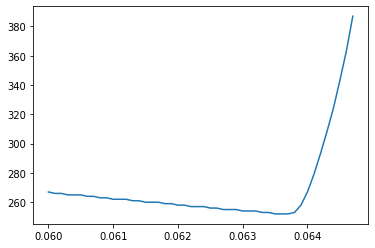

In [19]:
plt.plot(ss,N)

Здесь точка минимума шагов получается при оптимальным шагах = (0.0635, 0.0636, 0.0637). В таком случае с точностью до 1e-7 можем получить решение за 252 итераций

-----

### __2*__. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [20]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1., 0.5])
for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    '''for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
    W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y))))

    if i % 100 == 0:
        print(i, W, err)

0 [5.502 5.002] 3173.15
100 [11.82211538 11.32211538] 737.0918269230771
200 [11.82211538 11.32211538] 737.0918269230771
300 [11.82211538 11.32211538] 737.0918269230771
400 [11.82211538 11.32211538] 737.0918269230771
500 [11.82211538 11.32211538] 737.0918269230771
600 [11.82211538 11.32211538] 737.0918269230771
700 [11.82211538 11.32211538] 737.0918269230771
800 [11.82211538 11.32211538] 737.0918269230771
900 [11.82211538 11.32211538] 737.0918269230771


__Решение__

При матричном умножении *__np.sum__* суммирует все члены в полученном результате а нам необходимо получить массив соотвественно нам необходимо умножать матрицы.

Для этого:
    

In [21]:
W = np.array([[1., 0.5]]) # определим вектор W как одномерный массив (это позволит нам использовать транспонирование) 

for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= (alpha * (1/n * 2 * X.dot((y_pred - y).T).T)) 
    #вектор (y_pred - y) необходимо траспонировать чтобы могли умножить на него матрицу X, 
    # полученный результат необходимо еще раз транспонировать чтобы привести масив W к исходной форме
    if i % 100 == 0:
        print(i, W, err)

0 [[2.102 3.9  ]] 3173.15
100 [[31.88770806  6.74418155]] 175.19445858001842
200 [[41.83683774  4.90699865]] 61.9177717428135
300 [[45.33508261  4.26102097]] 47.913169919666785
400 [[46.56511152  4.03388672]] 46.181755648107604
500 [[46.99760587  3.95402334]] 45.96769776787538
600 [[47.14967657  3.92594232]] 45.941233404700036
700 [[47.20314662  3.91606866]] 45.93796156758051
800 [[47.2219474   3.91259695]] 45.93755706443538
900 [[47.228558    3.91137626]] 45.937507054979434
